Consistent FEM

------------ Maximum V and M -------------
Exact: V = 0.4909247554052497 | M = 0.04217698434298908
N = 2: V = 0.4896806731708959 | M = 0.037596496143441994
N = 4: V = 0.4908447836116495 | M = 0.037576370528432004
N = 8: V = 0.49091972000358514 | M = 0.03757506246139548
N = 16: V = 0.490924440178543 | M = 0.03757497986747965
N = 32: V = 0.49092473577298756 | M = 0.037574974692032505
N = 64: V = 0.49092475425136206 | M = 0.037677429874317284
N = 128: V = 0.4909247554052497 | M = 0.037677429873520574

------------ Minimum V and M -------------
Exact: V = -0.3272570627765684 | M = -0.08667528214058055
N = 2: V = -0.4194102359200132 | M = -0.08603171922988474
N = 4: V = -0.41824612547925955 | M = -0.08663390006527177
N = 8: V = -0.41817118908732537 | M = -0.08667267632827735
N = 16: V = -0.4181664689123615 | M = -0.0866751190096408
N = 32: V = -0.4181661733180889 | M = -0.08667527198223217
N = 64: V = -0.4181661548268429 | M = -0.08667528154517869
N = 128: V = -0.41816615367

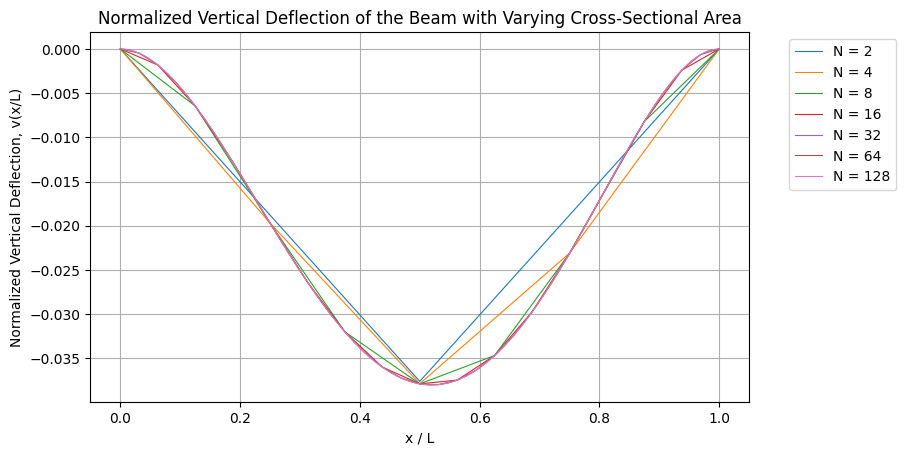

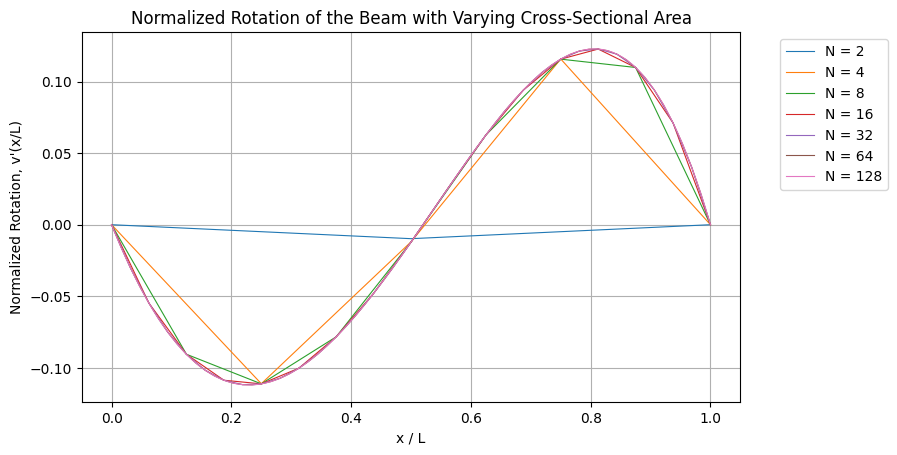

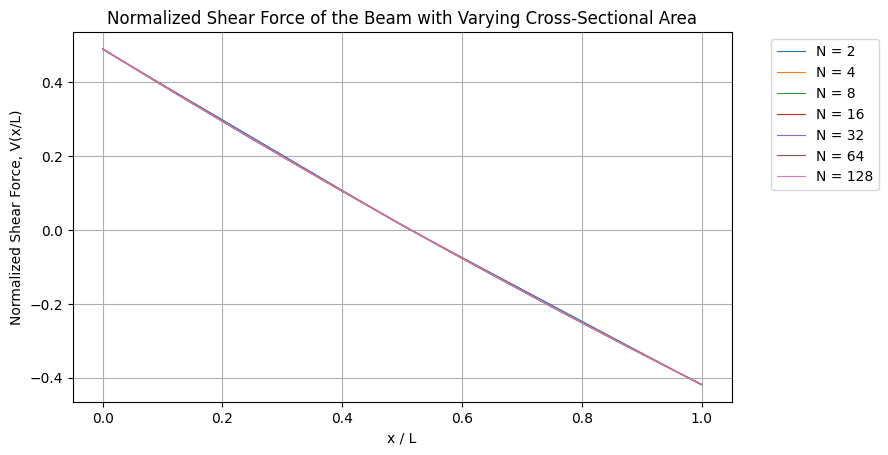

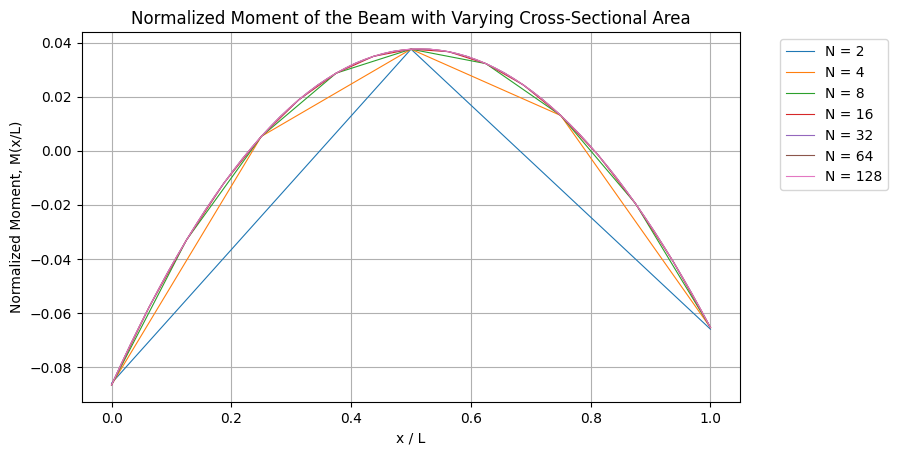

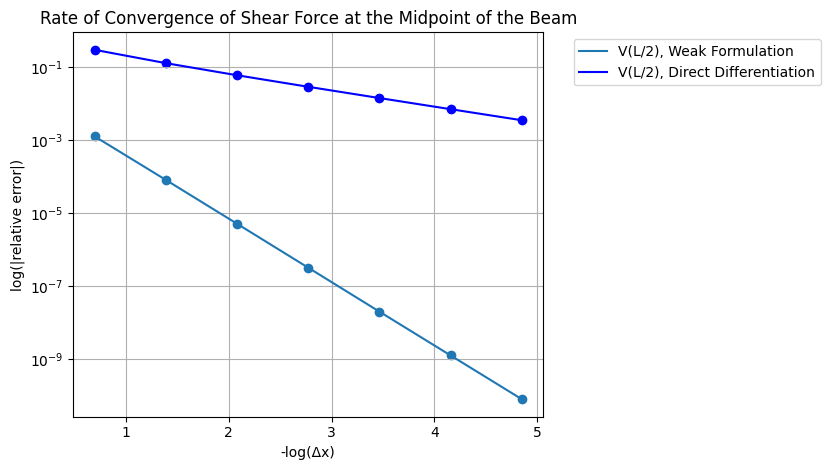

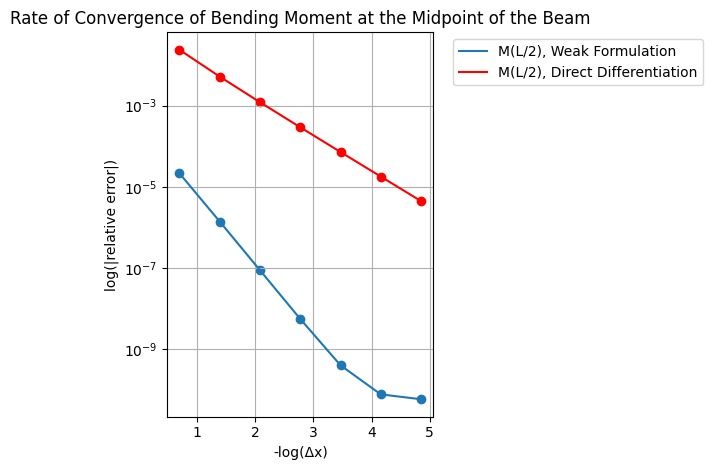

--------- Rates of convergence ---------

Consistent FEM
- Weak Formulation
β (V(L/2)): 3.9882
β (M(L/2)): 3.2684
- Direct Differentiation
β (V(L/2)): 1.0597
β (M(L/2)): 1.0597

Oversimplified FEM

------------ Maximum V and M -------------
Exact: V = 0.4907958866122085 | M = 0.038914774445311384
N = 2: V = 0.4811521192292323 | M = 0.037598709178052483
N = 4: V = 0.48793486657143137 | M = 0.03780348479102125
N = 8: V = 0.49005152485979325 | M = 0.03785991996164424
N = 16: V = 0.49061000311341896 | M = 0.03787407333406951
N = 32: V = 0.4907515097740984 | M = 0.03787760947649375
N = 64: V = 0.49078700528267183 | M = 0.03797879647343007
N = 128: V = 0.4907958866122085 | M = 0.03797915618638355

------------ Minimum V and M -------------
Exact: V = -0.3980930022766803 | M = -0.08630710789512124
N = 2: V = -0.4279387898616768 | M = -0.08176522922444245
N = 4: V = -0.42115604251947825 | M = -0.08495182728257342
N = 8: V = -0.4190393842311175 | M = -0.08595372125613057
N = 16: V = -0.41848090

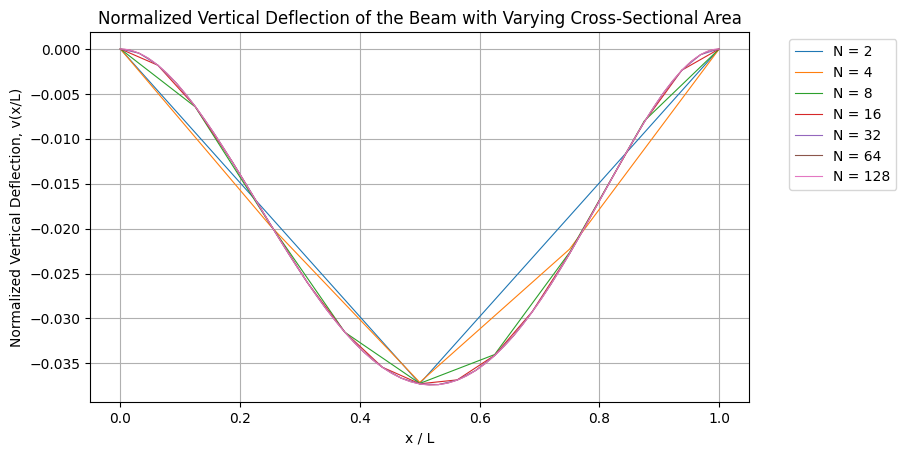

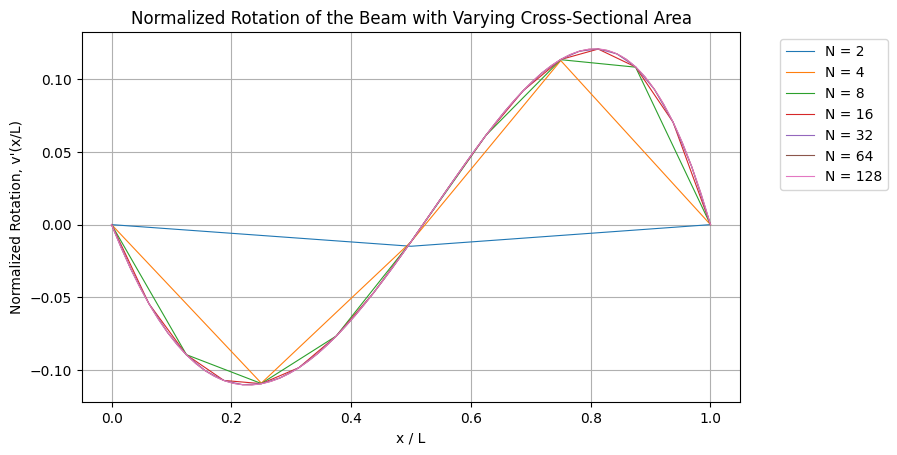

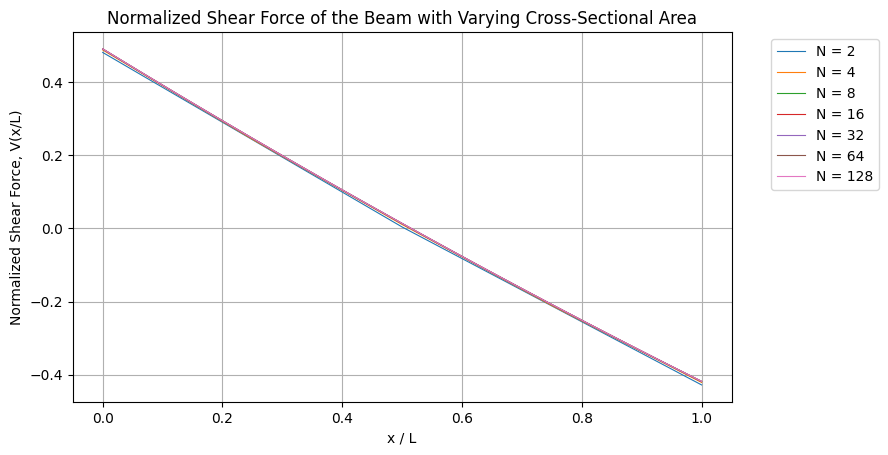

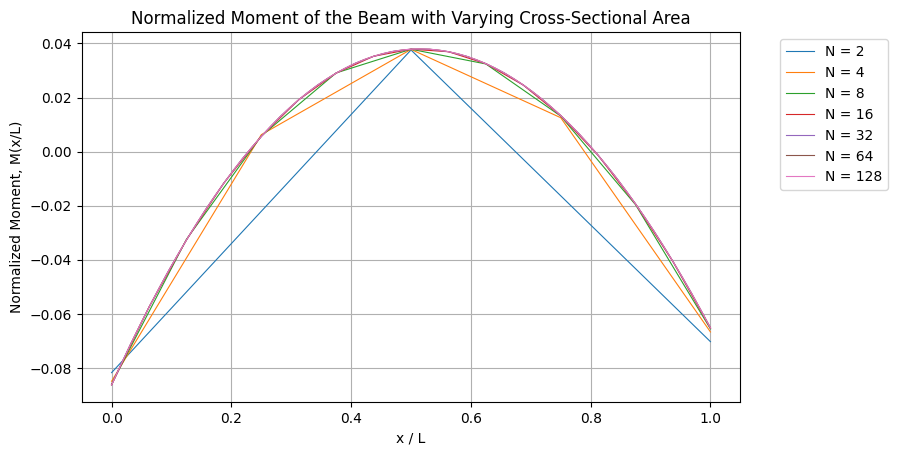

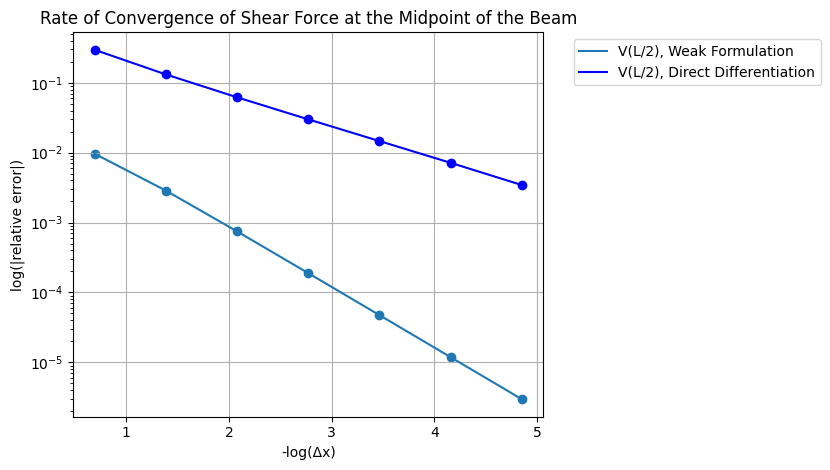

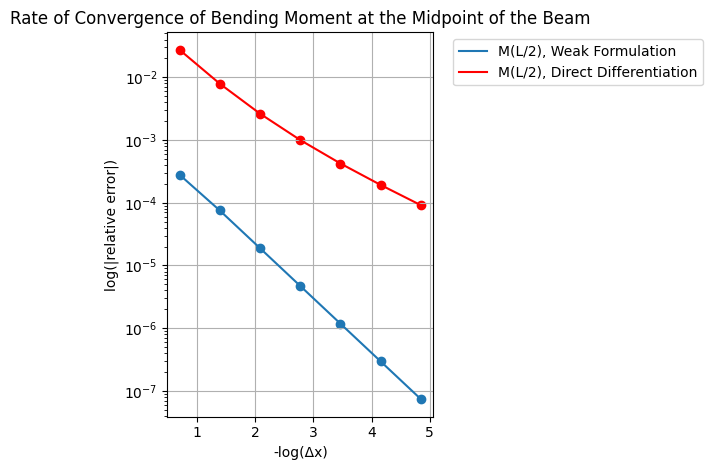

--------- Rates of convergence ---------

Oversimplified FEM
- Weak Formulation
β (V(L/2)): 1.9579
β (M(L/2)): 1.9884
- Direct Differentiation
β (V(L/2)): 1.0631
β (M(L/2)): 1.0631



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
""" Beam with Rectangular Cross-Section of Varying Height """
""" (Fixed-Fixed Boundary Conditions) """

###########
# Variables
rho = 1 # density
g = 1 # gravity
w = 1
E = 1 # modulus of elasticity
L = 1 # length
b = 1 # width
h_0 = 1 # initial height
h_L = (9/11)*h_0 # second height
I_0 = (b*h_0**3)/12 # moment of inertia for initial height
I_L = (b*h_L**3)/12 # moment of inertia for second height

Elements = [2, 4, 8, 16, 32, 64, 128] # N values

##############################################
# Shape and Richardson Extrapolation Functions
def psi(m, x_1, x_2, x, degree):
  H = [[1, x_1, x_1**2, x_1**3], [0, 1, 2*x_1, 3*x_1**2], [1, x_2, x_2**2, x_2**3], [0, 1, 2*x_2,3*x_2**2]]
  H_inv = np.linalg.inv(H)
  coefficients = []
  for i in range(4):
    coefficients.append(H_inv[i][m - 1])
  if degree == 0:
    return np.matmul(coefficients, [[1], [x], [x**2], [x**3]])
  elif degree == 1:
    return np.matmul(coefficients, [[0], [1], [2*x], [3*x**2]])
  elif degree == 2:
    return np.matmul(coefficients, [[0], [0], [2], [6*x]])
  elif degree == 3:
    return np.matmul(coefficients, [[0], [0], [0], [6]])
  else:
    print("Error: incorrect degree derivative")

# Richardson
def Richardson(Q1, Q2, Q3):
  return (Q2**2 - Q1*Q3) / (2*Q2 - Q1 - Q3)

# Moment of Inertia, Step, and Load Functions
def h(x):
  return h_0*(1 - (x/L)) + h_L*(x/L)

def step_function(x):
  return -rho*g*h(x)*w

def I(x):
  return (b*((h(x))**3)) / 12

def I_simplified(x):
  return I_0*(1 - (x/L)) + I_L*(x/L)

def p_function(x):
  return step_function(x)

# Storage
v_store = np.zeros((Elements[-1] + 1, len(Elements)))
vprime_store = np.zeros((Elements[-1] + 1, len(Elements)))
V_store = np.zeros((Elements[-1] + 1, len(Elements)))
M_store = np.zeros((Elements[-1] + 1, len(Elements)))
V_midpoint_consistent_DD = []
M_midpoint_consistent_DD = []
v_store_simplified = np.zeros((Elements[-1] + 1, len(Elements)))
vprime_store_simplified = np.zeros((Elements[-1] + 1, len(Elements)))
V_store_simplified = np.zeros((Elements[-1] + 1, len(Elements)))
M_store_simplified = np.zeros((Elements[-1] + 1, len(Elements)))
V_midpoint_simplified_DD = []
M_midpoint_simplified_DD = []
v_store_oversimplified = np.zeros((Elements[-1] + 1, len(Elements)))
vprime_store_oversimplified = np.zeros((Elements[-1] + 1, len(Elements)))
V_store_oversimplified = np.zeros((Elements[-1] + 1, len(Elements)))
M_store_oversimplified = np.zeros((Elements[-1] + 1, len(Elements)))
V_midpoint_oversimplified_DD = []
M_midpoint_oversimplified_DD = []




####################################
# Consistent FEM
for N in Elements:
  delta_x = L/N

  k = np.zeros((4, 4, N))
  p = np.zeros((4, 1, N))

  for i in range(1, N + 1):
    x_1 = delta_x * (i - 1)
    x_2 = delta_x * (i)
    x_mid = delta_x * (i - 0.5)

    # Gauss-Legendre weights and points
    w1 = (delta_x / 2) * ((322 + 13*np.sqrt(70)) / 900)
    w2 = (delta_x / 2) * ((322 - 13*np.sqrt(70)) / 900)
    w3 = (delta_x / 2) * (128 / 225)
    w4 = (delta_x / 2) * ((322 + 13*np.sqrt(70)) / 900)
    w5 = (delta_x / 2) * ((322 - 13*np.sqrt(70)) / 900)
    xg1 = x_mid + ((delta_x / 2) * (1 / 3) * np.sqrt(5 - 2 * np.sqrt(10 / 7)))
    xg2 = x_mid + ((delta_x / 2) * (1 / 3) * np.sqrt(5 + 2 * np.sqrt(10 / 7)))
    xg3 = x_mid
    xg4 = x_mid - ((delta_x / 2) * (1 / 3) * np.sqrt(5 - 2 * np.sqrt(10 / 7)))
    xg5 = x_mid - ((delta_x / 2) * (1 / 3) * np.sqrt(5 + 2 * np.sqrt(10 / 7)))

    # k matrix
    for m in range(1,5):
      for n in range(1,5):
        k[m - 1][n - 1][i - 1] = w1*E*I(xg1)*psi(m, x_1, x_2, xg1, 2)*psi(n, x_1, x_2, xg1, 2) + w2*E*I(xg2)*psi(m, x_1, x_2, xg2, 2)*psi(n, x_1, x_2, xg2, 2) + w3*E*I(xg3)*psi(m, x_1, x_2, xg3, 2)*psi(n, x_1, x_2, xg3, 2) + w4*E*I(xg4)*psi(m, x_1, x_2, xg4, 2)*psi(n, x_1, x_2, xg4, 2) + w5*E*I(xg5)*psi(m, x_1, x_2, xg5, 2)*psi(n, x_1, x_2, xg5, 2)

    # p matrix
    for m in range(1,5):
      p[m - 1][0][i - 1] = w1*p_function(xg1)*psi(m, x_1, x_2, xg1, 0) + w2*p_function(xg2)*psi(m, x_1, x_2, xg2, 0) + w3*p_function(xg3)*psi(m, x_1, x_2, xg3, 0) + w4*p_function(xg4)*psi(m, x_1, x_2, xg4, 0) + w5*p_function(xg5)*psi(m, x_1, x_2, xg5, 0)

  # Global matrix assembly
  k_global = np.zeros((2*N+2, 2*N+2))
  p_global = np.zeros((2*N+2, 1))
  for i in range(1, N+1):
    index = 2*i - 1
    # Add element k matrix to global
    kzerobuff = np.zeros((2*N+2, 2*N+2))
    for j in range(4):
      kzerobuff[index + j - 1][index - 1] = k[j][0][i - 1]
      kzerobuff[index + j - 1][index] = k[j][1][i - 1]
      kzerobuff[index + j - 1][index + 1] = k[j][2][i - 1]
      kzerobuff[index + j - 1][index + 2] = k[j][3][i - 1]
    k_global = np.add(k_global, kzerobuff)
    # Add element p matrix to global
    pzerobuff = np.zeros((2*N+2, 1))
    for j in range(4):
      pzerobuff[index + j - 1][0] = p[j][0][i - 1]
    p_global = np.add(p_global, pzerobuff)

    # Apply fixed-fixed B.C.'s to reduce matrix
  k_global_reduced = np.delete(k_global, 0, axis = 0)
  k_global_reduced = np.delete(k_global_reduced, 0, axis = 0)
  k_global_reduced = np.delete(k_global_reduced, 0, axis = 1)
  k_global_reduced = np.delete(k_global_reduced, 0, axis = 1)
  k_global_reduced = np.delete(k_global_reduced, -1, axis = 0)
  k_global_reduced = np.delete(k_global_reduced, -1, axis = 1)
  k_global_reduced = np.delete(k_global_reduced, -1, axis = 0)
  k_global_reduced = np.delete(k_global_reduced, -1, axis = 1)
  p_global_reduced = np.delete(p_global, 0)
  p_global_reduced = np.delete(p_global_reduced, 0)
  p_global_reduced = np.delete(p_global_reduced, -1)
  p_global_reduced = np.delete(p_global_reduced, -1)

  # Solve for displacement/rotation vector
  Vec = np.matmul(np.linalg.inv(k_global_reduced), p_global_reduced)
  Vec = np.insert(Vec, 0, 0, axis = 0)
  Vec = np.insert(Vec, 0, 0, axis = 0)
  Vec = np.insert(Vec, 2*N, 0, axis = 0)
  Vec = np.insert(Vec, 2*N, 0, axis = 0)

  # Slicing result vector for v and v'
  v = []
  vprime = []
  for i in range(N + 1):
    v.append(Vec[2*i])
    vprime.append(Vec[2*i + 1])

  for i in range(1, N + 2):
    v_store[i - 1][int(np.log2(N)) - 1] = v[i - 1]
    vprime_store[i - 1][int(np.log2(N)) - 1] = vprime[i - 1]

  # Finding V and M at all nodes emplying weak formulation
  V = np.zeros((N + 1, 1))
  M = np.zeros((N + 1, 1))
  for i in range(1, N + 1):
    index = 2*i - 1
    Vec_element = []
    k_1 = []
    p_1 = []
    for j in range(4):
      Vec_element.append(Vec[index + j - 1])
    ViMi = k[:, :, i - 1] @ Vec_element - p[:, :, i - 1]
    ViMi = np.diagonal(ViMi)
    if (i == 1):
      V[0][0] = ViMi[0]
      M[0][0] = -ViMi[1]
    V[i][0] = -ViMi[2]
    M[i][0] = ViMi[3]

  # Storing V and M results
  for i in range(1, N + 2):
    V_store[i - 1][int(np.log2(N)) - 1] = V[i - 1][0]
    M_store[i - 1][int(np.log2(N)) - 1] = M[i - 1][0]

  # Computing and storing V_mid and M_mid
  mid_index = (N // 2) + 1
  X_1_mid = (mid_index - 1) * delta_x
  X_2_mid = mid_index * delta_x
  V_mid_direct = E*((b*(h(X_1_mid))**2/4)*(h_L - h_0)/L)*(v[mid_index - 1]*psi(1, X_1_mid, X_2_mid, X_1_mid, 2) + vprime[mid_index - 1]*psi(2, X_1_mid, X_2_mid, X_1_mid, 2) + v[mid_index]*psi(3, X_1_mid, X_2_mid, X_1_mid, 2) + vprime[mid_index]*psi(4, X_1_mid, X_2_mid, X_1_mid, 2))  + E*I(X_1_mid)*(v[mid_index - 1]*psi(1, X_1_mid, X_2_mid, X_1_mid, 3) + vprime[mid_index - 1]*psi(2, X_1_mid, X_2_mid, X_1_mid, 3) + v[mid_index]*psi(3, X_1_mid, X_2_mid, X_1_mid, 3) + vprime[mid_index]*psi(4, X_1_mid, X_2_mid, X_1_mid, 3))
  M_mid_direct = E*I(X_1_mid)*(v[mid_index - 1]*psi(1, X_1_mid, X_2_mid, X_1_mid, 2) + vprime[mid_index - 1]*psi(2, X_1_mid, X_2_mid, X_1_mid, 2) + v[mid_index]*psi(3, X_1_mid, X_2_mid, X_1_mid, 2) + vprime[mid_index]*psi(4, X_1_mid, X_2_mid, X_1_mid, 2))
  V_midpoint_consistent_DD.append(V_mid_direct[0])
  M_midpoint_consistent_DD.append(M_mid_direct[0])

####################################

# Over-Simplified FEM
for N in Elements:
  delta_x = L/N

  k = np.zeros((4, 4, N))
  p = np.zeros((4, 1, N))

  for i in range(1, N + 1):
    x_1 = delta_x * (i - 1)
    x_2 = delta_x * (i)
    x_mid = delta_x * (i - 0.5)

    # Gauss-Legendre weights and points

    w1 = (delta_x / 2) * ((322 + 13*np.sqrt(70)) / 900)
    w2 = (delta_x / 2) * ((322 - 13*np.sqrt(70)) / 900)
    w3 = (delta_x / 2) * (128 / 225)
    w4 = (delta_x / 2) * ((322 + 13*np.sqrt(70)) / 900)
    w5 = (delta_x / 2) * ((322 - 13*np.sqrt(70)) / 900)
    xg1 = x_mid + ((delta_x / 2) * (1 / 3) * np.sqrt(5 - 2 * np.sqrt(10 / 7)))
    xg2 = x_mid + ((delta_x / 2) * (1 / 3) * np.sqrt(5 + 2 * np.sqrt(10 / 7)))
    xg3 = x_mid
    xg4 = x_mid - ((delta_x / 2) * (1 / 3) * np.sqrt(5 - 2 * np.sqrt(10 / 7)))
    xg5 = x_mid - ((delta_x / 2) * (1 / 3) * np.sqrt(5 + 2 * np.sqrt(10 / 7)))

    # Constructing the k matrix
    for m in range(1,5):
      for n in range(1,5):
        k[m - 1][n - 1][i - 1] = w1*E*I_simplified(xg3)*psi(m, x_1, x_2, xg1, 2)*psi(n, x_1, x_2, xg1, 2) + w2*E*I_simplified(xg3)*psi(m, x_1, x_2, xg2, 2)*psi(n, x_1, x_2, xg2, 2) + w3*E*I_simplified(xg3)*psi(m, x_1, x_2, xg3, 2)*psi(n, x_1, x_2, xg3, 2) + w4*E*I_simplified(xg3)*psi(m, x_1, x_2, xg4, 2)*psi(n, x_1, x_2, xg4, 2) + w5*E*I_simplified(xg3)*psi(m, x_1, x_2, xg5, 2)*psi(n, x_1, x_2, xg5, 2)

    # Constructing the p matrix
    for m in range(1,5):
      p[m - 1][0][i - 1] = w1*p_function(xg1)*psi(m, x_1, x_2, xg1, 0) + w2*p_function(xg2)*psi(m, x_1, x_2, xg2, 0) + w3*p_function(xg3)*psi(m, x_1, x_2, xg3, 0) + w4*p_function(xg4)*psi(m, x_1, x_2, xg4, 0) + w5*p_function(xg5)*psi(m, x_1, x_2, xg5, 0)

  # Global matrix assembly
  k_global = np.zeros((2*N+2, 2*N+2))
  p_global = np.zeros((2*N+2, 1))

  for i in range(1, N+1):
    index = 2*i - 1

    # Add element k matrix to global
    kzerobuff = np.zeros((2*N+2, 2*N+2))
    for j in range(4):
      kzerobuff[index + j - 1][index - 1] = k[j][0][i - 1]
      kzerobuff[index + j - 1][index] = k[j][1][i - 1]
      kzerobuff[index + j - 1][index + 1] = k[j][2][i - 1]
      kzerobuff[index + j - 1][index + 2] = k[j][3][i - 1]
    k_global = np.add(k_global, kzerobuff)
    # Add element p matrix to global
    pzerobuff = np.zeros((2*N+2, 1))
    for j in range(4):
      pzerobuff[index + j - 1][0] = p[j][0][i - 1]
    p_global = np.add(p_global, pzerobuff)

  # Apply fixed-fixed B.C.'s to reduce matrix
  k_global_reduced = np.delete(k_global, 0, axis = 0)
  k_global_reduced = np.delete(k_global_reduced, 0, axis = 0)
  k_global_reduced = np.delete(k_global_reduced, 0, axis = 1)
  k_global_reduced = np.delete(k_global_reduced, 0, axis = 1)
  k_global_reduced = np.delete(k_global_reduced, -1, axis = 0)
  k_global_reduced = np.delete(k_global_reduced, -1, axis = 1)
  k_global_reduced = np.delete(k_global_reduced, -1, axis = 0)
  k_global_reduced = np.delete(k_global_reduced, -1, axis = 1)
  p_global_reduced = np.delete(p_global, 0)
  p_global_reduced = np.delete(p_global_reduced, 0)
  p_global_reduced = np.delete(p_global_reduced, -1)
  p_global_reduced = np.delete(p_global_reduced, -1)

  # Solve for displacement/rotation vector

  Vec = np.matmul(np.linalg.inv(k_global_reduced), p_global_reduced)
  Vec = np.insert(Vec, 0, 0, axis = 0)
  Vec = np.insert(Vec, 0, 0, axis = 0)
  Vec = np.insert(Vec, 2*N, 0, axis = 0)
  Vec = np.insert(Vec, 2*N, 0, axis = 0)

  # Slicing result vector for v and v'
  v = []
  vprime = []
  for i in range(N + 1):
    v.append(Vec[2*i])
    vprime.append(Vec[2*i + 1])

  for i in range(1, N + 2):
    v_store_oversimplified[i - 1][int(np.log2(N)) - 1] = v[i - 1]
    vprime_store_oversimplified[i - 1][int(np.log2(N)) - 1] = vprime[i - 1]

  # Finding V and M at all nodes emplying weak formulation
  V = np.zeros((N + 1, 1))
  M = np.zeros((N + 1, 1))

  for i in range(1, N + 1):
    index = 2*i - 1
    Vec_element = []
    k_1 = []
    p_1 = []
    for j in range(4):
      Vec_element.append(Vec[index + j - 1])
    ViMi = k[:, :, i - 1] @ Vec_element - p[:, :, i - 1]
    ViMi = np.diagonal(ViMi)

    if (i == 1):
      V[0][0] = ViMi[0]
      M[0][0] = -ViMi[1]
    V[i][0] = -ViMi[2]
    M[i][0] = ViMi[3]

  # Storing V and M results
  for i in range(1, N + 2):
    V_store_oversimplified[i - 1][int(np.log2(N)) - 1] = V[i - 1][0]
    M_store_oversimplified[i - 1][int(np.log2(N)) - 1] = M[i - 1][0]

  # Computing and storing V_mid and M_mid
  mid_index = (N // 2) + 1
  X_1_mid = (mid_index - 1) * delta_x
  X_2_mid = mid_index * delta_x

  V_mid_direct = E*(I_simplified(x_mid))*(v[mid_index - 1]*psi(1, X_1_mid, X_2_mid, X_1_mid, 2) + vprime[mid_index - 1]*psi(2, X_1_mid, X_2_mid, X_1_mid, 2) + v[mid_index]*psi(3, X_1_mid, X_2_mid, X_1_mid, 2) + vprime[mid_index]*psi(4, X_1_mid, X_2_mid, X_1_mid, 2)) - E*I_simplified(X_1_mid)*(v[mid_index - 1]*psi(1, X_1_mid, X_2_mid, X_1_mid, 3) + vprime[mid_index - 1]*psi(2, X_1_mid, X_2_mid, X_1_mid, 3) + v[mid_index]*psi(3, X_1_mid, X_2_mid, X_1_mid, 3) + vprime[mid_index]*psi(4, X_1_mid, X_2_mid, X_1_mid, 3))
  M_mid_direct = E*I_simplified(X_1_mid)*(v[mid_index - 1]*psi(1, X_1_mid, X_2_mid, X_1_mid, 2) + vprime[mid_index - 1]*psi(2, X_1_mid, X_2_mid, X_1_mid, 2) + v[mid_index]*psi(3, X_1_mid, X_2_mid, X_1_mid, 2) + vprime[mid_index]*psi(4, X_1_mid, X_2_mid, X_1_mid, 2))
  V_midpoint_oversimplified_DD.append(V_mid_direct[0])
  M_midpoint_oversimplified_DD.append(M_mid_direct[0])

############################
# Richardson Extrapolation
# Consistent FEM
V_midpoint = []
M_midpoint = []
for i in range(len(Elements)):
  V_midpoint.append(V_store[Elements[i]//2][i])
  M_midpoint.append(M_store[Elements[i]//2][i])

V_midpoint_extrapolation_consistent = []
M_midpoint_extrapolation_consistent = []

for i in range(2, len(Elements)):
  V_midpoint_extrapolation_consistent.append(Richardson(V_midpoint[i - 2], V_midpoint[i - 1], V_midpoint[i]))
  M_midpoint_extrapolation_consistent.append(Richardson(M_midpoint[i - 2], M_midpoint[i - 1], M_midpoint[i]))


# Exact Solution
x = np.linspace(0,1,1000)
V_exact_consistent = V_store[0][6] - rho*g*h_0*x*(1 - (2*x / (11*L)))*w
M_exact_consistent = M_store[0][6] + V_store[0][6]*x + rho*g*h_0*(2*x**3 / (33*L))*w - rho*g*h_0*(x**2 / 2)*w



# Over-simplified FEM
V_midpoint_oversimplified = []
M_midpoint_oversimplified = []
for i in range(len(Elements)):
  V_midpoint_oversimplified.append(V_store_oversimplified[Elements[i]//2][i])
  M_midpoint_oversimplified.append(M_store_oversimplified[Elements[i]//2][i])

V_midpoint_extrapolation_oversimplified = []
M_midpoint_extrapolation_oversimplified = []

for i in range(2, len(Elements)):
  V_midpoint_extrapolation_oversimplified.append(Richardson(V_midpoint_oversimplified[i - 2], V_midpoint_oversimplified[i - 1], V_midpoint_oversimplified[i]))
  M_midpoint_extrapolation_oversimplified.append(Richardson(M_midpoint_oversimplified[i - 2], M_midpoint_oversimplified[i - 1], M_midpoint_oversimplified[i]))

################
# Exact Solution
x = np.linspace(0,1,1000)

V_exact_oversimplified = V_store_oversimplified[0][6] - rho*g*h_0*x*(1 - (1*x / (9*L)))*w
M_exact_oversimplified = M_store_oversimplified[0][6] + V_store_oversimplified[0][6]*x + rho*g*h_0*(1*x**3 / (27*L))*w - rho*g*h_0*(x**2 / 2)*w
###################################################
V_midpoint_exact_oversimplified = V_midpoint_extrapolation_oversimplified[-1]
M_midpoint_exact_oversimplified = M_midpoint_extrapolation_oversimplified[-1]

V_midpoint_exact_consistent = V_midpoint_extrapolation_consistent[-1]
M_midpoint_exact_consistent = M_midpoint_extrapolation_consistent[-1]

# Rate of Convergence
delta_x = []
for i in Elements:
  delta_x.append(1/i)

delta_x_log = -1*np.log(delta_x)

#####################
# Consistent FEM
# FEM Error
error_exact_V_mid_consistent = abs(V_midpoint - V_midpoint_exact_consistent)
rel_error_exact_V_mid_consistent = error_exact_V_mid_consistent / abs(V_midpoint_exact_consistent)
error_exact_V_mid_log_consistent = np.log(error_exact_V_mid_consistent)
error_exact_M_mid_consistent = abs(M_midpoint - M_midpoint_exact_consistent)
rel_error_exact_M_mid_consistent = error_exact_M_mid_consistent / abs(M_midpoint_exact_consistent)

error_exact_M_mid_log_consistent = np.log(error_exact_M_mid_consistent)
error_exact_V_mid_DD_consistent = abs(V_midpoint_consistent_DD - V_midpoint_exact_consistent)
rel_error_exact_V_mid_DD_consistent = error_exact_V_mid_DD_consistent / abs(V_midpoint_exact_consistent)
error_exact_V_mid_log_DD_consistent = np.log(error_exact_V_mid_DD_consistent)
error_exact_M_mid_DD_consistent = abs(M_midpoint_consistent_DD - M_midpoint_exact_consistent)
rel_error_exact_M_mid_DD_consistent = error_exact_M_mid_DD_consistent / abs(M_midpoint_exact_consistent)
error_exact_M_mid_log_DD_consistent = np.log(error_exact_M_mid_DD_consistent)

# Error from extrapolation
error_extrapolated_V_mid_consistent = abs(V_midpoint_extrapolation_consistent - V_midpoint_exact_consistent)
error_extrapolated_M_mid_consistent = abs(M_midpoint_extrapolation_consistent - M_midpoint_exact_consistent)

# Over-simplified FEM
# FEM Error
error_exact_V_mid_oversimplified = abs(V_midpoint_oversimplified - V_midpoint_exact_oversimplified)
rel_error_exact_V_mid_oversimplified = error_exact_V_mid_oversimplified / abs(V_midpoint_exact_oversimplified)
error_exact_V_mid_log_oversimplified = np.log(error_exact_V_mid_oversimplified)
error_exact_M_mid_oversimplified = abs(M_midpoint_oversimplified - M_midpoint_exact_oversimplified)
rel_error_exact_M_mid_oversimplified = error_exact_M_mid_oversimplified / abs(M_midpoint_exact_oversimplified)

error_exact_M_mid_log_oversimplified = np.log(error_exact_M_mid_oversimplified)
error_exact_V_mid_DD_oversimplified = abs(V_midpoint_oversimplified_DD - V_midpoint_exact_oversimplified)
rel_error_exact_V_mid_DD_oversimplified = error_exact_V_mid_DD_oversimplified / abs(V_midpoint_exact_oversimplified)
error_exact_V_mid_log_DD_oversimplified = np.log(error_exact_V_mid_DD_oversimplified)
error_exact_M_mid_DD_oversimplified = abs(M_midpoint_oversimplified_DD - M_midpoint_exact_oversimplified)
rel_error_exact_M_mid_DD_oversimplified = error_exact_M_mid_DD_oversimplified / abs(M_midpoint_exact_oversimplified)
error_exact_M_mid_log_DD_oversimplified = np.log(error_exact_M_mid_DD_oversimplified)

# Error from extrapolation
error_extrapolated_V_mid_oversimplified = abs(V_midpoint_extrapolation_oversimplified - V_midpoint_exact_oversimplified)
error_extrapolated_M_mid_oversimplified = abs(M_midpoint_extrapolation_oversimplified - M_midpoint_exact_oversimplified)

############
# Beta values
beta_V_mid_consistent_WF = []
beta_V_mid_consistent_DD = []
beta_M_mid_consistent_WF = []
beta_M_mid_consistent_DD = []

beta_V_mid_oversimplified_WF = []
beta_V_mid_oversimplified_DD = []
beta_M_mid_oversimplified_WF = []
beta_M_mid_oversimplified_DD = []

for i in range(len(error_exact_V_mid_oversimplified) - 1):
  beta_V_mid_consistent_WF.append(np.log2(error_exact_V_mid_consistent[i] / error_exact_V_mid_consistent[i + 1]))
  beta_V_mid_consistent_DD.append(np.log2(error_exact_V_mid_DD_consistent[i] / error_exact_V_mid_DD_consistent[i + 1]))
  beta_M_mid_consistent_WF.append(np.log2(error_exact_M_mid_consistent[i] / error_exact_M_mid_consistent[i + 1]))
  beta_M_mid_consistent_DD.append(np.log2(error_exact_M_mid_DD_consistent[i] / error_exact_M_mid_DD_consistent[i + 1]))

  beta_V_mid_oversimplified_WF.append(np.log2(error_exact_V_mid_oversimplified[i] / error_exact_V_mid_oversimplified[i + 1]))
  beta_V_mid_oversimplified_DD.append(np.log2(error_exact_V_mid_DD_oversimplified[i] / error_exact_V_mid_DD_oversimplified[i + 1]))
  beta_M_mid_oversimplified_WF.append(np.log2(error_exact_M_mid_oversimplified[i] / error_exact_M_mid_oversimplified[i + 1]))
  beta_M_mid_oversimplified_DD.append(np.log2(error_exact_M_mid_DD_oversimplified[i] / error_exact_M_mid_DD_oversimplified[i + 1]))

# Plotting
x_2 = np.linspace(0,1,3)
x_4 = np.linspace(0,1,5)
x_8 = np.linspace(0,1,9)
x_16 = np.linspace(0,1,17)
x_32 = np.linspace(0,1,33)
x_64 = np.linspace(0,1,65)
x_128 = np.linspace(0,1,129)


###########################################
# Consistent Analysis
# Maximum and minimum shear force and moment
print("Consistent FEM")
print()
print("------------ Maximum V and M -------------")
print("Exact: V =", max(V_exact_consistent), "| M =", max(M_exact_consistent))
print("N = 2: V =", max(V_store[:,0]), "| M =", max(M_store[:,0]))
print("N = 4: V =", max(V_store[:,1]), "| M =", max(M_store[:,1]))
print("N = 8: V =", max(V_store[:,2]), "| M =", max(M_store[:,2]))
print("N = 16: V =", max(V_store[:,3]), "| M =", max(M_store[:,3]))
print("N = 32: V =", max(V_store[:,4]), "| M =", max(M_store[:,4]))
print("N = 64: V =", max(V_store[:,5]), "| M =", max(M_store[:,5]))
print("N = 128: V =", max(V_store[:,6]), "| M =", max(M_store[:,6]))
print()
print("------------ Minimum V and M -------------")
print("Exact: V =", min(V_exact_consistent), "| M =", min(M_exact_consistent))
print("N = 2: V =", min(V_store[:,0]), "| M =", min(M_store[:,0]))
print("N = 4: V =", min(V_store[:,1]), "| M =", min(M_store[:,1]))
print("N = 8: V =", min(V_store[:,2]), "| M =", min(M_store[:,2]))
print("N = 16: V =", min(V_store[:,3]), "| M =", min(M_store[:,3]))
print("N = 32: V =", min(V_store[:,4]), "| M =", min(M_store[:,4]))
print("N = 64: V =", min(V_store[:,5]), "| M =", min(M_store[:,5]))
print("N = 128: V =", min(V_store[:,6]), "| M =", min(M_store[:,6]))
print()

####################################
v_plot_consistent = plt.figure(9)
v_plot_consistent.set_figwidth(8.5)
plt.xlabel("x / L")
plt.ylabel("Normalized Vertical Deflection, v(x/L)")
plt.title("Normalized Vertical Deflection of the Beam with Varying Cross-Sectional Area")
plt.plot(x_2,v_store[0:3, 0],label="N = 2",linewidth=0.8)
plt.plot(x_4,v_store[0:5, 1],label="N = 4",linewidth=0.8)
plt.plot(x_8,v_store[0:9, 2],label="N = 8",linewidth=0.8)
plt.plot(x_16,v_store[0:17, 3],label="N = 16",linewidth=0.8)
plt.plot(x_32,v_store[0:33, 4],label="N = 32",linewidth=0.8)
plt.plot(x_64,v_store[0:65, 5],label="N = 64",linewidth=0.8)
plt.plot(x_128,v_store[0:129, 6],label="N = 128",linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

##########################################
vprime_plot_consistent = plt.figure(10)
vprime_plot_consistent.set_figwidth(8.5)
plt.xlabel("x / L")
plt.ylabel("Normalized Rotation, v'(x/L)")
plt.title("Normalized Rotation of the Beam with Varying Cross-Sectional Area")
plt.plot(x_2,vprime_store[0:3, 0],label="N = 2",linewidth=0.8)
plt.plot(x_4,vprime_store[0:5, 1],label="N = 4",linewidth=0.8)
plt.plot(x_8,vprime_store[0:9, 2],label="N = 8",linewidth=0.8)
plt.plot(x_16,vprime_store[0:17, 3],label="N = 16",linewidth=0.8)
plt.plot(x_32,vprime_store[0:33, 4],label="N = 32",linewidth=0.8)
plt.plot(x_64,vprime_store[0:65, 5],label="N = 64",linewidth=0.8)
plt.plot(x_128,vprime_store[0:129, 6],label="N = 128",linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

#####################################
V_plot_consistent = plt.figure(11)
V_plot_consistent.set_figwidth(8.5)
plt.xlabel("x / L")
plt.ylabel("Normalized Shear Force, V(x/L)")
plt.title("Normalized Shear Force of the Beam with Varying Cross-Sectional Area")
plt.plot(x_2,V_store[0:3, 0],label="N = 2",linewidth=0.8)
plt.plot(x_4,V_store[0:5, 1],label="N = 4",linewidth=0.8)
plt.plot(x_8,V_store[0:9, 2],label="N = 8",linewidth=0.8)
plt.plot(x_16,V_store[0:17, 3],label="N = 16",linewidth=0.8)
plt.plot(x_32,V_store[0:33, 4],label="N = 32",linewidth=0.8)
plt.plot(x_64,V_store[0:65, 5],label="N = 64",linewidth=0.8)
plt.plot(x_128,V_store[0:129, 6],label="N = 128",linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

#####################################
M_plot_consistent = plt.figure(12)
M_plot_consistent.set_figwidth(8.5)
plt.xlabel("x / L")
plt.ylabel("Normalized Moment, M(x/L)")
plt.title("Normalized Moment of the Beam with Varying Cross-Sectional Area")
plt.plot(x_2,M_store[0:3, 0],label="N = 2",linewidth=0.8)

plt.plot(x_4,M_store[0:5, 1],label="N = 4",linewidth=0.8)
plt.plot(x_8,M_store[0:9, 2],label="N = 8",linewidth=0.8)
plt.plot(x_16,M_store[0:17, 3],label="N = 16",linewidth=0.8)
plt.plot(x_32,M_store[0:33, 4],label="N = 32",linewidth=0.8)
plt.plot(x_64,M_store[0:65, 5],label="N = 64",linewidth=0.8)
plt.plot(x_128,M_store[0:129, 6],label="N = 128",linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

##############################################

V_mid_error_plot_consistent = plt.figure(19)
V_mid_error_plot_consistent.set_figwidth(8.5)
plt.plot(delta_x_log,error_exact_V_mid_consistent,label="V(L/2), Weak Formulation")
plt.plot(delta_x_log,error_exact_V_mid_DD_consistent,label="V(L/2), Direct Differentiation", color ="blue")
plt.scatter(delta_x_log,error_exact_V_mid_consistent)
plt.scatter(delta_x_log,error_exact_V_mid_DD_consistent, color = "blue")
plt.yscale("log")
plt.xlabel("-log(Δx)")
plt.ylabel("log(|relative error|)")
plt.title("Rate of Convergence of Shear Force at the Midpoint of the Beam")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

################################################
M_mid_error_plot_consistent = plt.figure(20)

plt.plot(delta_x_log,error_exact_M_mid_consistent,label="M(L/2), Weak Formulation")
plt.plot(delta_x_log,error_exact_M_mid_DD_consistent,label="M(L/2), Direct Differentiation", color="red")
plt.scatter(delta_x_log,error_exact_M_mid_consistent)
plt.scatter(delta_x_log,error_exact_M_mid_DD_consistent, color = "red")
plt.yscale("log")
plt.xlabel("-log(Δx)")
plt.ylabel("log(|relative error|)")
plt.title("Rate of Convergence of Bending Moment at the Midpoint of the Beam")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

print("--------- Rates of convergence ---------")
print()

print("Consistent FEM")
print("- Weak Formulation")
slope, intercept = np.polyfit(delta_x_log,error_exact_V_mid_log_consistent,1)
print("β (V(L/2)):", float('%.5g' % abs(slope)))
slope, intercept = np.polyfit(delta_x_log,error_exact_M_mid_log_consistent,1)
print("β (M(L/2)):", float('%.5g' % abs(slope)))
print("- Direct Differentiation")
slope, intercept = np.polyfit(delta_x_log,error_exact_V_mid_log_DD_consistent,1)
print("β (V(L/2)):", float('%.5g' % abs(slope)))
slope, intercept = np.polyfit(delta_x_log,error_exact_V_mid_log_DD_consistent,1)
print("β (M(L/2)):", float('%.5g' % abs(slope)))
print()

































###########################################
# Maximum and minimum shear force and moment
print("Oversimplified FEM")
print()
print("------------ Maximum V and M -------------")
print("Exact: V =", max(V_exact_oversimplified), "| M =", max(M_exact_oversimplified))
print("N = 2: V =", max(V_store_oversimplified[:,0]), "| M =", max(M_store_oversimplified[:,0]))
print("N = 4: V =", max(V_store_oversimplified[:,1]), "| M =", max(M_store_oversimplified[:,1]))
print("N = 8: V =", max(V_store_oversimplified[:,2]), "| M =", max(M_store_oversimplified[:,2]))
print("N = 16: V =", max(V_store_oversimplified[:,3]), "| M =", max(M_store_oversimplified[:,3]))
print("N = 32: V =", max(V_store_oversimplified[:,4]), "| M =", max(M_store_oversimplified[:,4]))
print("N = 64: V =", max(V_store_oversimplified[:,5]), "| M =", max(M_store_oversimplified[:,5]))
print("N = 128: V =", max(V_store_oversimplified[:,6]), "| M =", max(M_store_oversimplified[:,6]))
print()
print("------------ Minimum V and M -------------")
print("Exact: V =", min(V_exact_oversimplified), "| M =", min(M_exact_oversimplified))
print("N = 2: V =", min(V_store_oversimplified[:,0]), "| M =", min(M_store_oversimplified[:,0]))
print("N = 4: V =", min(V_store_oversimplified[:,1]), "| M =", min(M_store_oversimplified[:,1]))
print("N = 8: V =", min(V_store_oversimplified[:,2]), "| M =", min(M_store_oversimplified[:,2]))
print("N = 16: V =", min(V_store_oversimplified[:,3]), "| M =", min(M_store_oversimplified[:,3]))
print("N = 32: V =", min(V_store_oversimplified[:,4]), "| M =", min(M_store_oversimplified[:,4]))
print("N = 64: V =", min(V_store_oversimplified[:,5]), "| M =", min(M_store_oversimplified[:,5]))
print("N = 128: V =", min(V_store_oversimplified[:,6]), "| M =", min(M_store_oversimplified[:,6]))
print()

####################################
v_plot_oversimplified = plt.figure(9)
v_plot_oversimplified.set_figwidth(8.5)
plt.xlabel("x / L")
plt.ylabel("Normalized Vertical Deflection, v(x/L)")
plt.title("Normalized Vertical Deflection of the Beam with Varying Cross-Sectional Area")
plt.plot(x_2,v_store_oversimplified[0:3, 0],label="N = 2",linewidth=0.8)
plt.plot(x_4,v_store_oversimplified[0:5, 1],label="N = 4",linewidth=0.8)
plt.plot(x_8,v_store_oversimplified[0:9, 2],label="N = 8",linewidth=0.8)
plt.plot(x_16,v_store_oversimplified[0:17, 3],label="N = 16",linewidth=0.8)
plt.plot(x_32,v_store_oversimplified[0:33, 4],label="N = 32",linewidth=0.8)
plt.plot(x_64,v_store_oversimplified[0:65, 5],label="N = 64",linewidth=0.8)
plt.plot(x_128,v_store_oversimplified[0:129, 6],label="N = 128",linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

##########################################
vprime_plot_oversimplified = plt.figure(10)
vprime_plot_oversimplified.set_figwidth(8.5)
plt.xlabel("x / L")
plt.ylabel("Normalized Rotation, v'(x/L)")
plt.title("Normalized Rotation of the Beam with Varying Cross-Sectional Area")
plt.plot(x_2,vprime_store_oversimplified[0:3, 0],label="N = 2",linewidth=0.8)
plt.plot(x_4,vprime_store_oversimplified[0:5, 1],label="N = 4",linewidth=0.8)
plt.plot(x_8,vprime_store_oversimplified[0:9, 2],label="N = 8",linewidth=0.8)
plt.plot(x_16,vprime_store_oversimplified[0:17, 3],label="N = 16",linewidth=0.8)
plt.plot(x_32,vprime_store_oversimplified[0:33, 4],label="N = 32",linewidth=0.8)
plt.plot(x_64,vprime_store_oversimplified[0:65, 5],label="N = 64",linewidth=0.8)

plt.plot(x_128,vprime_store_oversimplified[0:129, 6],label="N = 128",linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

#####################################
V_plot_oversimplified = plt.figure(11)
V_plot_oversimplified.set_figwidth(8.5)
plt.xlabel("x / L")
plt.ylabel("Normalized Shear Force, V(x/L)")
plt.title("Normalized Shear Force of the Beam with Varying Cross-Sectional Area")
plt.plot(x_2,V_store_oversimplified[0:3, 0],label="N = 2",linewidth=0.8)
plt.plot(x_4,V_store_oversimplified[0:5, 1],label="N = 4",linewidth=0.8)
plt.plot(x_8,V_store_oversimplified[0:9, 2],label="N = 8",linewidth=0.8)
plt.plot(x_16,V_store_oversimplified[0:17, 3],label="N = 16",linewidth=0.8)
plt.plot(x_32,V_store_oversimplified[0:33, 4],label="N = 32",linewidth=0.8)
plt.plot(x_64,V_store_oversimplified[0:65, 5],label="N = 64",linewidth=0.8)
plt.plot(x_128,V_store_oversimplified[0:129, 6],label="N = 128",linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

#####################################
M_plot_oversimplified = plt.figure(12)
M_plot_oversimplified.set_figwidth(8.5)
plt.xlabel("x / L")
plt.ylabel("Normalized Moment, M(x/L)")
plt.title("Normalized Moment of the Beam with Varying Cross-Sectional Area")
plt.plot(x_2,M_store_oversimplified[0:3, 0],label="N = 2",linewidth=0.8)

plt.plot(x_4,M_store_oversimplified[0:5, 1],label="N = 4",linewidth=0.8)
plt.plot(x_8,M_store_oversimplified[0:9, 2],label="N = 8",linewidth=0.8)
plt.plot(x_16,M_store_oversimplified[0:17, 3],label="N = 16",linewidth=0.8)
plt.plot(x_32,M_store_oversimplified[0:33, 4],label="N = 32",linewidth=0.8)
plt.plot(x_64,M_store_oversimplified[0:65, 5],label="N = 64",linewidth=0.8)
plt.plot(x_128,M_store_oversimplified[0:129, 6],label="N = 128",linewidth=0.8)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

##############################################

V_mid_error_plot_oversimplified = plt.figure(19)
V_mid_error_plot_oversimplified.set_figwidth(8.5)
plt.plot(delta_x_log,error_exact_V_mid_oversimplified,label="V(L/2), Weak Formulation")
plt.plot(delta_x_log,error_exact_V_mid_DD_oversimplified,label="V(L/2), Direct Differentiation", color ="blue")
plt.scatter(delta_x_log,error_exact_V_mid_oversimplified)
plt.scatter(delta_x_log,error_exact_V_mid_DD_oversimplified, color = "blue")
plt.yscale("log")
plt.xlabel("-log(Δx)")
plt.ylabel("log(|relative error|)")
plt.title("Rate of Convergence of Shear Force at the Midpoint of the Beam")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

################################################
M_mid_error_plot_oversimplified = plt.figure(20)

plt.plot(delta_x_log,error_exact_M_mid_oversimplified,label="M(L/2), Weak Formulation")
plt.plot(delta_x_log,error_exact_M_mid_DD_oversimplified,label="M(L/2), Direct Differentiation", color="red")
plt.scatter(delta_x_log,error_exact_M_mid_oversimplified)
plt.scatter(delta_x_log,error_exact_M_mid_DD_oversimplified, color = "red")

plt.yscale("log")
plt.xlabel("-log(Δx)")
plt.ylabel("log(|relative error|)")
plt.title("Rate of Convergence of Bending Moment at the Midpoint of the Beam")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

print("--------- Rates of convergence ---------")
print()

print("Oversimplified FEM")
print("- Weak Formulation")
slope, intercept = np.polyfit(delta_x_log,error_exact_V_mid_log_oversimplified,1)
print("β (V(L/2)):", float('%.5g' % abs(slope)))
slope, intercept = np.polyfit(delta_x_log,error_exact_M_mid_log_oversimplified,1)
print("β (M(L/2)):", float('%.5g' % abs(slope)))
print("- Direct Differentiation")
slope, intercept = np.polyfit(delta_x_log,error_exact_V_mid_log_DD_oversimplified,1)
print("β (V(L/2)):", float('%.5g' % abs(slope)))
slope, intercept = np.polyfit(delta_x_log,error_exact_V_mid_log_DD_oversimplified,1)
print("β (M(L/2)):", float('%.5g' % abs(slope)))
print()

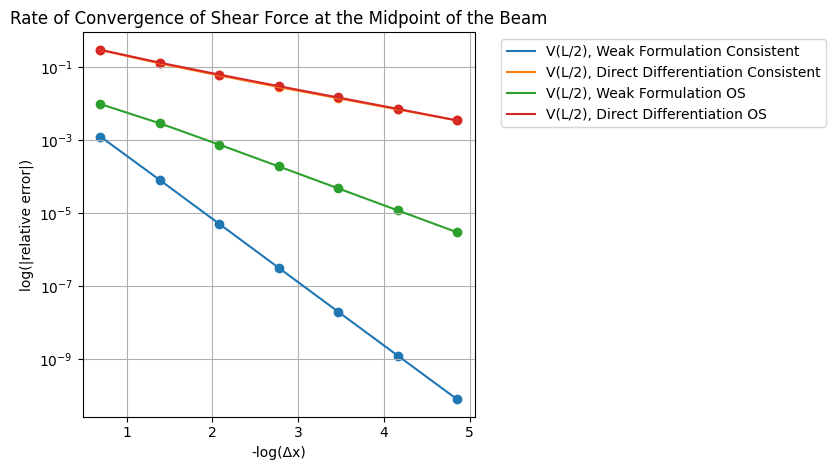

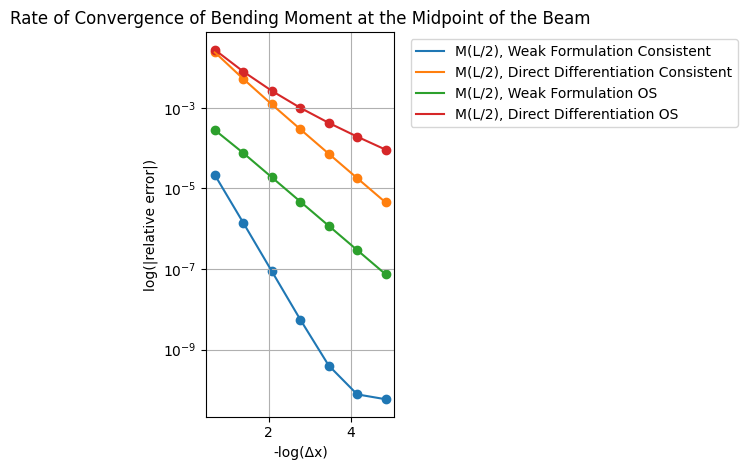

In [ ]:
# combined plots

V_mid_error_plot_consistent = plt.figure(19)
V_mid_error_plot_consistent.set_figwidth(8.5)
plt.plot(delta_x_log,error_exact_V_mid_consistent,label="V(L/2), Weak Formulation Consistent")
plt.plot(delta_x_log,error_exact_V_mid_DD_consistent,label="V(L/2), Direct Differentiation Consistent")
plt.scatter(delta_x_log,error_exact_V_mid_consistent)
plt.scatter(delta_x_log,error_exact_V_mid_DD_consistent)
plt.plot(delta_x_log,error_exact_V_mid_oversimplified,label="V(L/2), Weak Formulation OS")
plt.plot(delta_x_log,error_exact_V_mid_DD_oversimplified,label="V(L/2), Direct Differentiation OS")
plt.scatter(delta_x_log,error_exact_V_mid_oversimplified)
plt.scatter(delta_x_log,error_exact_V_mid_DD_oversimplified)
plt.yscale("log")
plt.xlabel("-log(Δx)")
plt.ylabel("log(|relative error|)")
plt.title("Rate of Convergence of Shear Force at the Midpoint of the Beam")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

################################################
M_mid_error_plot_consistent = plt.figure(20)

plt.plot(delta_x_log,error_exact_M_mid_consistent,label="M(L/2), Weak Formulation Consistent")
plt.plot(delta_x_log,error_exact_M_mid_DD_consistent,label="M(L/2), Direct Differentiation Consistent")
plt.scatter(delta_x_log,error_exact_M_mid_consistent)
plt.scatter(delta_x_log,error_exact_M_mid_DD_consistent)
plt.plot(delta_x_log,error_exact_M_mid_oversimplified,label="M(L/2), Weak Formulation OS")
plt.plot(delta_x_log,error_exact_M_mid_DD_oversimplified,label="M(L/2), Direct Differentiation OS")
plt.scatter(delta_x_log,error_exact_M_mid_oversimplified)
plt.scatter(delta_x_log,error_exact_M_mid_DD_oversimplified)

plt.yscale("log")
plt.xlabel("-log(Δx)")
plt.ylabel("log(|relative error|)")
plt.title("Rate of Convergence of Bending Moment at the Midpoint of the Beam")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

[ 0.         -0.0196556  -0.03711984 -0.0222962   0.        ]
[0.   0.25 0.5  0.75 1.  ]


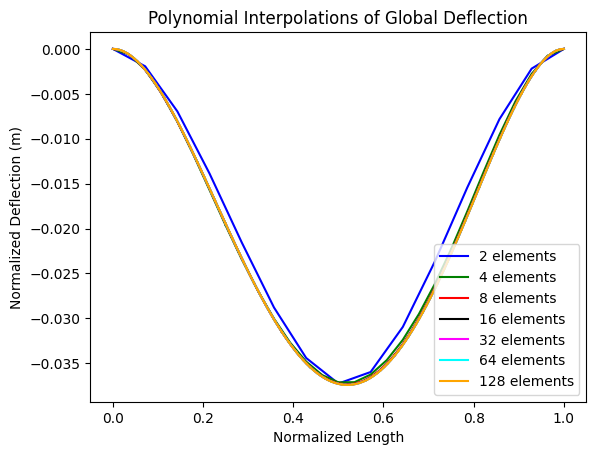

In [ ]:
print(v_store_oversimplified[0:5,1])
print(x_4)

def element_deflection(x, element_num, total_elements):
  index2 = int(np.log2(total_elements) - 1)
  index1 = 2**total_elements + 1
  consider = v_store_oversimplified[0:index1, index2]

  consider2 = vprime_store_oversimplified[0:index1, index2]

  consider3 = eval('x_'+str(total_elements))

  x_iminus1 = consider3[element_num - 1]
  x_i = consider3[element_num]

  v_iminus1 = consider[element_num - 1]
  v_i = consider[element_num]

  vprime_iminus1 = consider2[element_num - 1]
  vprime_i = consider2[element_num]

  sum = v_iminus1 * psi(1, x_iminus1, x_i, x, 0) + vprime_iminus1 * psi(2, x_iminus1, x_i, x, 0) + v_i * psi(3, x_iminus1, x_i, x, 0) + vprime_i * psi(4, x_iminus1, x_i, x, 0)
  return sum

color_wheel = ['blue', 'green', 'red', 'black', 'magenta', 'cyan', 'orange']

def polynomial_deflection(num_elements):
  consider = eval('x_'+str(num_elements))
  color_index = int(np.log2(num_elements) - 1)
  color = color_wheel[color_index]
  for i in range(1, num_elements+1):
    submesh = np.linspace(consider[i-1], consider[i], 8)
    submesh_result = [element_deflection(x, i, num_elements) for x in submesh]
    if i == 1:
      plt.plot(submesh, submesh_result, color, label=str(num_elements)+' elements')
    else:
      plt.plot(submesh, submesh_result, color)

polynomial_deflection(2)
polynomial_deflection(4)
polynomial_deflection(8)
polynomial_deflection(16)
polynomial_deflection(32)
polynomial_deflection(64)
polynomial_deflection(128)


plt.title('Polynomial Interpolations of Global Deflection')
plt.xlabel('Normalized Length')
plt.ylabel('Normalized Deflection (m)')
plt.legend(loc='lower right')
plt.show()

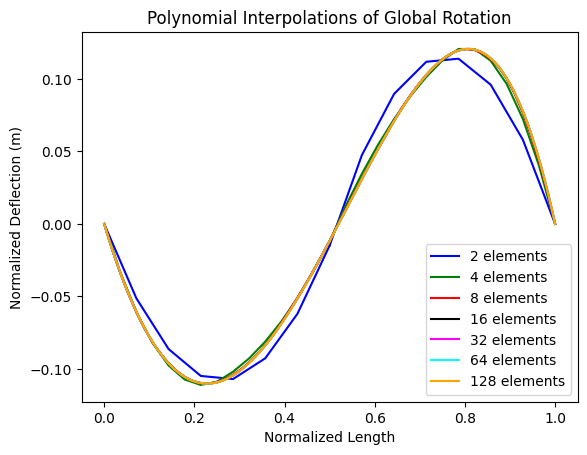

[ 0.         -0.03725406  0.        ]


In [ ]:
def element_rotation(x, element_num, total_elements):
  index2 = int(np.log2(total_elements) - 1)
  index1 = 2**total_elements + 1
  consider = v_store_oversimplified[0:index1, index2]

  consider2 = vprime_store_oversimplified[0:index1, index2]

  consider3 = eval('x_'+str(total_elements))

  x_iminus1 = consider3[element_num - 1]
  x_i = consider3[element_num]

  v_iminus1 = consider[element_num - 1]
  v_i = consider[element_num]

  vprime_iminus1 = consider2[element_num - 1]
  vprime_i = consider2[element_num]

  sum = v_iminus1 * psi(1, x_iminus1, x_i, x, 1) + vprime_iminus1 * psi(2, x_iminus1, x_i, x, 1) + v_i * psi(3, x_iminus1, x_i, x, 1) + vprime_i * psi(4, x_iminus1, x_i, x, 1)
  return sum

color_wheel = ['blue', 'green', 'red', 'black', 'magenta', 'cyan', 'orange']

def polynomial_rotation(num_elements):
  consider = eval('x_'+str(num_elements))
  color_index = int(np.log2(num_elements) - 1)
  color = color_wheel[color_index]
  for i in range(1, num_elements+1):
    submesh = np.linspace(consider[i-1], consider[i], 8)
    submesh_result = [element_rotation(x, i, num_elements) for x in submesh]
    if i == 1:
      plt.plot(submesh, submesh_result, color, label=str(num_elements)+' elements')
    else:
      plt.plot(submesh, submesh_result, color)

polynomial_rotation(2)
polynomial_rotation(4)
polynomial_rotation(8)
polynomial_rotation(16)
polynomial_rotation(32)
polynomial_rotation(64)
polynomial_rotation(128)

plt.title('Polynomial Interpolations of Global Rotation')
plt.xlabel('Normalized Length')
plt.ylabel('Normalized Deflection (m)')
plt.legend(loc='lower right')
plt.show()

print(v_store_oversimplified[0:3, 0])

In [ ]:
import numpy as np
from tabulate import tabulate
headers = ['1', '2', '3', '4', '5', '6', '7', '8']
total = [vprime_store[0:3, 0], vprime_store[0:5, 1], vprime_store[0:9, 2]]

table = tabulate(total, headers, tablefmt="fancy_grid")

print(table)

╒═════╤═════════════╤════════════╤════════════╤════════════╤═══════════╤══════════╤══════════╕
│   1 │           2 │          3 │          4 │          5 │         6 │        7 │        8 │
╞═════╪═════════════╪════════════╪════════════╪════════════╪═══════════╪══════════╪══════════╡
│   0 │ -0.00975271 │  0         │            │            │           │          │          │
├─────┼─────────────┼────────────┼────────────┼────────────┼───────────┼──────────┼──────────┤
│   0 │ -0.111039   │ -0.0119784 │  0.115738  │  0         │           │          │          │
├─────┼─────────────┼────────────┼────────────┼────────────┼───────────┼──────────┼──────────┤
│   0 │ -0.09048    │ -0.111137  │ -0.0782986 │ -0.0121216 │ 0.0626266 │ 0.115619 │ 0.109808 │
╘═════╧═════════════╧════════════╧════════════╧════════════╧═══════════╧══════════╧══════════╛


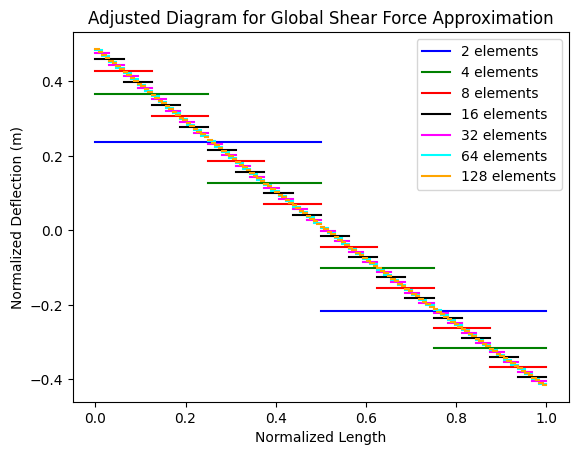

In [ ]:
# adjusted shear force diagrams
color_wheel = ['blue', 'green', 'red', 'black', 'magenta', 'cyan', 'orange']
def adjusted_shear_plotter(x, element_num, total_elements):
  index2 = int(np.log2(total_elements) - 1)
  index1 = 2**total_elements + 1
  consider = v_store_oversimplified[0:index1, index2]

  consider2 = vprime_store_oversimplified[0:index1, index2]

  consider3 = eval('x_'+str(total_elements))

  x_iminus1 = consider3[element_num - 1]
  x_i = consider3[element_num]

  v_iminus1 = consider[element_num - 1]
  v_i = consider[element_num]

  vprime_iminus1 = consider2[element_num - 1]
  vprime_i = consider2[element_num]

  sum = v_iminus1 * psi(1, x_iminus1, x_i, x, 3) + vprime_iminus1 * psi(2, x_iminus1, x_i, x, 3) + v_i * psi(3, x_iminus1, x_i, x, 3) + vprime_i * psi(4, x_iminus1, x_i, x, 3)
  return sum * E * I_simplified((x_iminus1 + x_i)/2)

def polynomial_shear(num_elements):
  consider = eval('x_'+str(num_elements))
  color_index = int(np.log2(num_elements) - 1)
  color = color_wheel[color_index]
  for i in range(1, num_elements+1):
    submesh = np.linspace(consider[i-1], consider[i], 8)
    submesh_result = [adjusted_shear_plotter(x, i, num_elements) for x in submesh]
    if i == 1:
      plt.plot(submesh, submesh_result, color, label=str(num_elements)+' elements')
    else:
      plt.plot(submesh, submesh_result, color)

polynomial_shear(2)
polynomial_shear(4)
polynomial_shear(8)
polynomial_shear(16)
polynomial_shear(32)
polynomial_shear(64)
polynomial_shear(128)

plt.title('Adjusted Diagram for Global Shear Force Approximation')
plt.xlabel('Normalized Length')
plt.ylabel('Normalized Deflection (m)')
plt.legend(loc='upper right')
plt.show()

In [ ]:
print

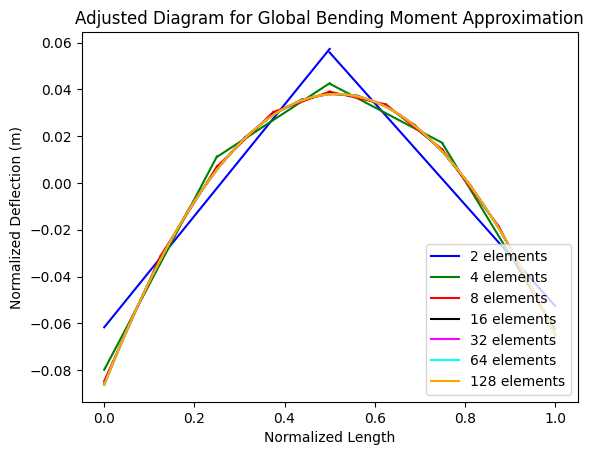

In [ ]:
# adjusted bending moment diagram
color_wheel = ['blue', 'green', 'red', 'black', 'magenta', 'cyan', 'orange']
def adjusted_moment_plotter(x, element_num, total_elements):
  index2 = int(np.log2(total_elements) - 1)
  index1 = 2**total_elements + 1
  consider = v_store_oversimplified[0:index1, index2]

  consider2 = vprime_store_oversimplified[0:index1, index2]

  consider3 = eval('x_'+str(total_elements))

  x_iminus1 = consider3[element_num - 1]
  x_i = consider3[element_num]

  v_iminus1 = consider[element_num - 1]
  v_i = consider[element_num]

  vprime_iminus1 = consider2[element_num - 1]
  vprime_i = consider2[element_num]

  sum = v_iminus1 * psi(1, x_iminus1, x_i, x, 2) + vprime_iminus1 * psi(2, x_iminus1, x_i, x, 2) + v_i * psi(3, x_iminus1, x_i, x, 2) + vprime_i * psi(4, x_iminus1, x_i, x, 2)
  return sum * E * I_simplified((x_iminus1 + x_i)/2)

def polynomial_moment(num_elements):
  consider = eval('x_'+str(num_elements))
  color_index = int(np.log2(num_elements) - 1)
  color = color_wheel[color_index]
  for i in range(1, num_elements+1):
    submesh = np.linspace(consider[i-1], consider[i], 8)
    submesh_result = [adjusted_moment_plotter(x, i, num_elements) for x in submesh]
    if i == 1:
      plt.plot(submesh, submesh_result, color, label=str(num_elements)+' elements')
    else:
      plt.plot(submesh, submesh_result, color)

polynomial_moment(2)
polynomial_moment(4)
polynomial_moment(8)
polynomial_moment(16)
polynomial_moment(32)
polynomial_moment(64)
polynomial_moment(128)

plt.title('Adjusted Diagram for Global Bending Moment Approximation')
plt.xlabel('Normalized Length')
plt.ylabel('Normalized Deflection (m)')
plt.legend(loc='lower right')
plt.show()

[ 0.         -0.01970443 -0.03787026 -0.02310489  0.        ]
[0.   0.25 0.5  0.75 1.  ]


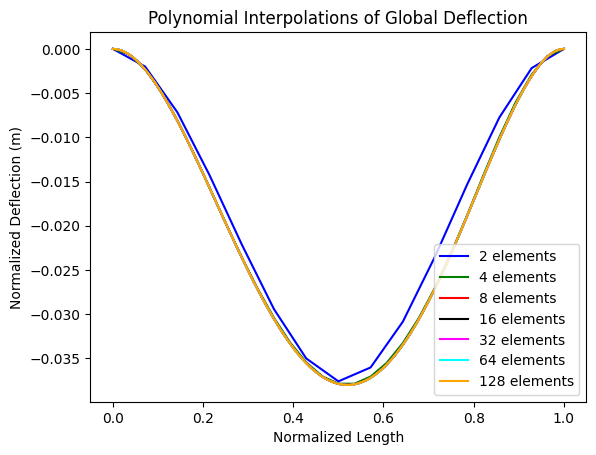

In [ ]:
print(v_store[0:5,1])
print(x_4)

def element_deflection(x, element_num, total_elements):
  index2 = int(np.log2(total_elements) - 1)
  index1 = 2**total_elements + 1
  consider = v_store[0:index1, index2]

  consider2 = vprime_store[0:index1, index2]

  consider3 = eval('x_'+str(total_elements))

  x_iminus1 = consider3[element_num - 1]
  x_i = consider3[element_num]

  v_iminus1 = consider[element_num - 1]
  v_i = consider[element_num]

  vprime_iminus1 = consider2[element_num - 1]
  vprime_i = consider2[element_num]

  sum = v_iminus1 * psi(1, x_iminus1, x_i, x, 0) + vprime_iminus1 * psi(2, x_iminus1, x_i, x, 0) + v_i * psi(3, x_iminus1, x_i, x, 0) + vprime_i * psi(4, x_iminus1, x_i, x, 0)
  return sum

color_wheel = ['blue', 'green', 'red', 'black', 'magenta', 'cyan', 'orange']

def polynomial_deflection(num_elements):
  consider = eval('x_'+str(num_elements))
  color_index = int(np.log2(num_elements) - 1)
  color = color_wheel[color_index]
  for i in range(1, num_elements+1):
    submesh = np.linspace(consider[i-1], consider[i], 8)
    submesh_result = [element_deflection(x, i, num_elements) for x in submesh]
    if i == 1:
      plt.plot(submesh, submesh_result, color, label=str(num_elements)+' elements')
    else:
      plt.plot(submesh, submesh_result, color)

polynomial_deflection(2)
polynomial_deflection(4)
polynomial_deflection(8)
polynomial_deflection(16)
polynomial_deflection(32)
polynomial_deflection(64)
polynomial_deflection(128)


plt.title('Polynomial Interpolations of Global Deflection')
plt.xlabel('Normalized Length')
plt.ylabel('Normalized Deflection (m)')
plt.legend(loc='lower right')
plt.show()

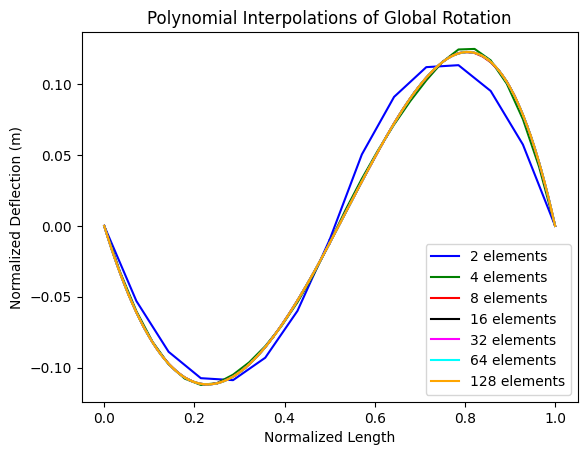

[ 0.         -0.03760554  0.        ]


In [ ]:
def element_rotation(x, element_num, total_elements):
  index2 = int(np.log2(total_elements) - 1)
  index1 = 2**total_elements + 1
  consider = v_store[0:index1, index2]

  consider2 = vprime_store[0:index1, index2]

  consider3 = eval('x_'+str(total_elements))

  x_iminus1 = consider3[element_num - 1]
  x_i = consider3[element_num]

  v_iminus1 = consider[element_num - 1]
  v_i = consider[element_num]

  vprime_iminus1 = consider2[element_num - 1]
  vprime_i = consider2[element_num]

  sum = v_iminus1 * psi(1, x_iminus1, x_i, x, 1) + vprime_iminus1 * psi(2, x_iminus1, x_i, x, 1) + v_i * psi(3, x_iminus1, x_i, x, 1) + vprime_i * psi(4, x_iminus1, x_i, x, 1)
  return sum

color_wheel = ['blue', 'green', 'red', 'black', 'magenta', 'cyan', 'orange']

def polynomial_rotation(num_elements):
  consider = eval('x_'+str(num_elements))
  color_index = int(np.log2(num_elements) - 1)
  color = color_wheel[color_index]
  for i in range(1, num_elements+1):
    submesh = np.linspace(consider[i-1], consider[i], 8)
    submesh_result = [element_rotation(x, i, num_elements) for x in submesh]
    if i == 1:
      plt.plot(submesh, submesh_result, color, label=str(num_elements)+' elements')
    else:
      plt.plot(submesh, submesh_result, color)

polynomial_rotation(2)
polynomial_rotation(4)
polynomial_rotation(8)
polynomial_rotation(16)
polynomial_rotation(32)
polynomial_rotation(64)
polynomial_rotation(128)

plt.title('Polynomial Interpolations of Global Rotation')
plt.xlabel('Normalized Length')
plt.ylabel('Normalized Deflection (m)')
plt.legend(loc='lower right')
plt.show()

print(v_store[0:3, 0])

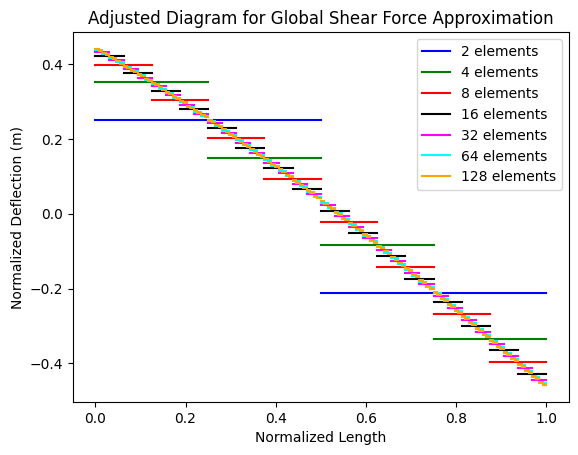

In [ ]:
# adjusted shear force diagrams
color_wheel = ['blue', 'green', 'red', 'black', 'magenta', 'cyan', 'orange']
def adjusted_shear_plotter(x, element_num, total_elements):
  index2 = int(np.log2(total_elements) - 1)
  index1 = 2**total_elements + 1
  consider = v_store[0:index1, index2]

  consider2 = vprime_store[0:index1, index2]

  consider3 = eval('x_'+str(total_elements))

  x_iminus1 = consider3[element_num - 1]
  x_i = consider3[element_num]

  v_iminus1 = consider[element_num - 1]
  v_i = consider[element_num]

  vprime_iminus1 = consider2[element_num - 1]
  vprime_i = consider2[element_num]

  sum = v_iminus1 * psi(1, x_iminus1, x_i, x, 3) + vprime_iminus1 * psi(2, x_iminus1, x_i, x, 3) + v_i * psi(3, x_iminus1, x_i, x, 3) + vprime_i * psi(4, x_iminus1, x_i, x, 3)
  return sum * E * I_simplified((x_iminus1 + x_i)/2)

def polynomial_shear(num_elements):
  consider = eval('x_'+str(num_elements))
  color_index = int(np.log2(num_elements) - 1)
  color = color_wheel[color_index]
  for i in range(1, num_elements+1):
    submesh = np.linspace(consider[i-1], consider[i], 8)
    submesh_result = [adjusted_shear_plotter(x, i, num_elements) for x in submesh]
    if i == 1:
      plt.plot(submesh, submesh_result, color, label=str(num_elements)+' elements')
    else:
      plt.plot(submesh, submesh_result, color)

polynomial_shear(2)
polynomial_shear(4)
polynomial_shear(8)
polynomial_shear(16)
polynomial_shear(32)
polynomial_shear(64)
polynomial_shear(128)

plt.title('Adjusted Diagram for Global Shear Force Approximation')
plt.xlabel('Normalized Length')
plt.ylabel('Normalized Deflection (m)')
plt.legend(loc='upper right')
plt.show()

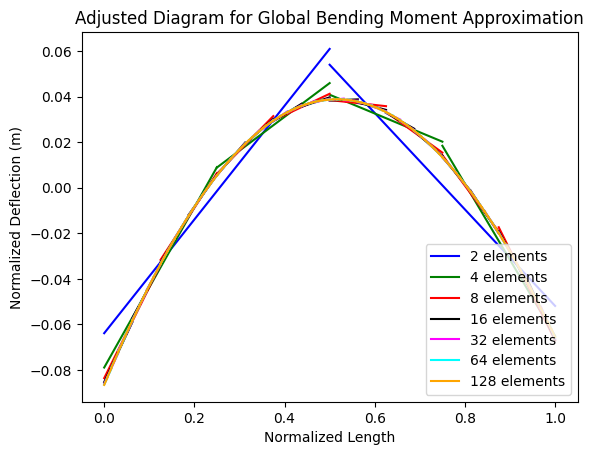

In [ ]:
# adjusted bending moment diagram
color_wheel = ['blue', 'green', 'red', 'black', 'magenta', 'cyan', 'orange']
def adjusted_moment_plotter(x, element_num, total_elements):
  index2 = int(np.log2(total_elements) - 1)
  index1 = 2**total_elements + 1
  consider = v_store[0:index1, index2]

  consider2 = vprime_store[0:index1, index2]

  consider3 = eval('x_'+str(total_elements))

  x_iminus1 = consider3[element_num - 1]
  x_i = consider3[element_num]

  v_iminus1 = consider[element_num - 1]
  v_i = consider[element_num]

  vprime_iminus1 = consider2[element_num - 1]
  vprime_i = consider2[element_num]

  sum = v_iminus1 * psi(1, x_iminus1, x_i, x, 2) + vprime_iminus1 * psi(2, x_iminus1, x_i, x, 2) + v_i * psi(3, x_iminus1, x_i, x, 2) + vprime_i * psi(4, x_iminus1, x_i, x, 2)
  return sum * E * I_simplified((x_iminus1 + x_i)/2)

def polynomial_moment(num_elements):
  consider = eval('x_'+str(num_elements))
  color_index = int(np.log2(num_elements) - 1)
  color = color_wheel[color_index]
  for i in range(1, num_elements+1):
    submesh = np.linspace(consider[i-1], consider[i], 8)
    submesh_result = [adjusted_moment_plotter(x, i, num_elements) for x in submesh]
    if i == 1:
      plt.plot(submesh, submesh_result, color, label=str(num_elements)+' elements')
    else:
      plt.plot(submesh, submesh_result, color)

polynomial_moment(2)
polynomial_moment(4)
polynomial_moment(8)
polynomial_moment(16)
polynomial_moment(32)
polynomial_moment(64)
polynomial_moment(128)

plt.title('Adjusted Diagram for Global Bending Moment Approximation')
plt.xlabel('Normalized Length')
plt.ylabel('Normalized Deflection (m)')
plt.legend(loc='lower right')
plt.show()